# Pregunta 1 - Raices de una función

### Encuentre la o las raíces de la ecuación planteada.
### Compare la solución para dos métodos diferentes vistos en clase.
### Determine el número de iteraciones de ambos métodos hasta la convergencia.
### Describa el criterio de parada utilizado.
### Grafique el comportamiento de ambos métodos.
### Para un método que requiera estimación inicial, grafique su comportamiento para 3 estimaciones iniciales diferentes.

# f(x)=x^3+2*x^2−5

# Métodos aprendidos en clase
## Método de bisección
## Método de Newton
## Método de la secante

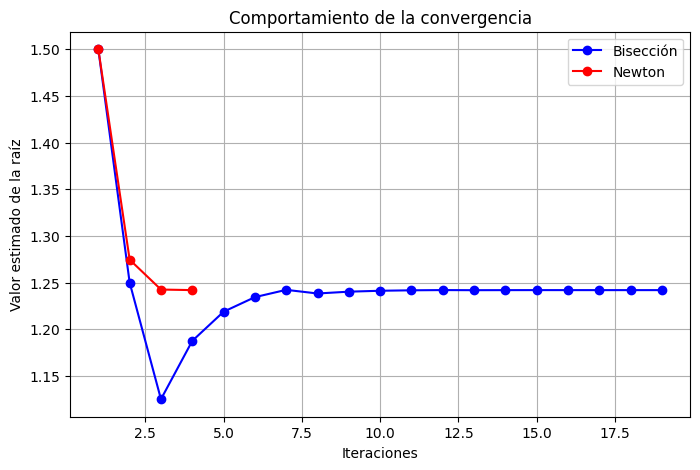

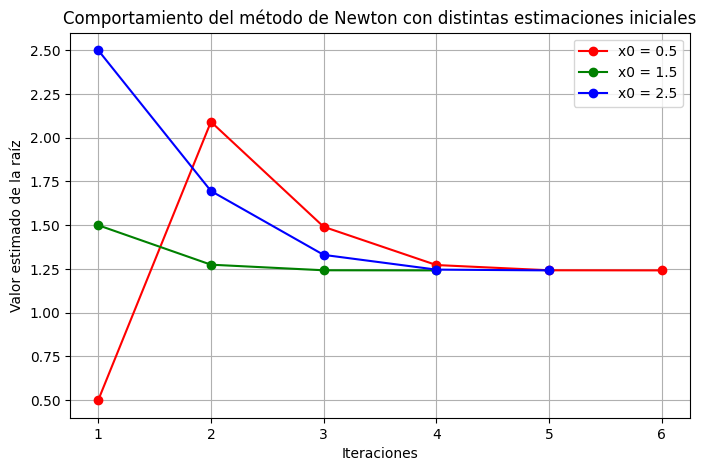

Método de Bisección: Raíz = 1.241896, Iteraciones = 19
Método de Newton: Raíz = 1.241897, Iteraciones = 4


In [3]:
import numpy as np
import matplotlib.pyplot as plt


# Definir la función y su derivada
def f(x):
    return x ** 3 + 2 * x ** 2 - 5


def df(x):
    return 3 * x ** 2 + 4 * x


# Método de Bisección
def biseccion(a, b, tol=1e-6, max_iter=100):
    if f(a) * f(b) >= 0:
        raise ValueError("El intervalo no encierra una raíz.")

    iteraciones = []
    while (b - a) / 2 > tol and len(iteraciones) < max_iter:
        c = (a + b) / 2
        iteraciones.append(c)  # Guardar valores de c en cada iteración

        if f(c) == 0:
            break
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c

    return c, len(iteraciones), iteraciones


# Método de Newton
def newton(x0, tol=1e-6, max_iter=100):
    iteraciones = []
    x = x0

    while abs(f(x)) > tol and len(iteraciones) < max_iter:
        if df(x) == 0:
            raise ValueError("La derivada se anuló, el método falla.")

        iteraciones.append(x)  # Guardar valores de x en cada iteración
        x = x - f(x) / df(x)

    return x, len(iteraciones), iteraciones


# Parámetros de prueba
a, b = 1, 2  # Intervalo para la bisección
x0 = 1.5  # Estimación inicial para Newton

# Ejecutar métodos
raiz_biseccion, iter_biseccion, pasos_biseccion = biseccion(a, b)
raiz_newton, iter_newton, pasos_newton = newton(x0)

# Graficar la convergencia de ambos métodos
plt.figure(figsize=(8, 5))

plt.plot(range(1, iter_biseccion + 1), pasos_biseccion, 'bo-', label="Bisección")
plt.plot(range(1, iter_newton + 1), pasos_newton, 'ro-', label="Newton")

plt.xlabel("Iteraciones")
plt.ylabel("Valor estimado de la raíz")
plt.title("Comportamiento de la convergencia")
plt.legend()
plt.grid()
plt.show()

# Análisis de Newton-Raphson con tres estimaciones iniciales diferentes
x0_values = [0.5, 1.5, 2.5]  # Tres estimaciones iniciales
colores = ['r', 'g', 'b']

plt.figure(figsize=(8, 5))
for i, x0 in enumerate(x0_values):
    try:
        raiz, iteraciones, pasos = newton(x0)
        plt.plot(range(1, iteraciones + 1), pasos, marker='o', linestyle='-', color=colores[i], label=f"x0 = {x0}")
    except ValueError:
        print(f"Newton-Raphson falló para x0 = {x0} debido a una derivada nula.")

plt.xlabel("Iteraciones")
plt.ylabel("Valor estimado de la raíz")
plt.title("Comportamiento del método de Newton con distintas estimaciones iniciales")
plt.legend()
plt.grid()
plt.show()

# Mostrar resultados finales
print(f"Método de Bisección: Raíz = {raiz_biseccion:.6f}, Iteraciones = {iter_biseccion}")
print(f"Método de Newton: Raíz = {raiz_newton:.6f}, Iteraciones = {iter_newton}")